In [ ]:
# PARAMETERS (Papermill-friendly)
# Configure base directory and derive common paths for Phase 2
import os

# Prefer env var for robustness when papermill parameters cell tag is missing
_env_base = os.getenv("RETAILSENSE_BASE_DIR")
if _env_base and _env_base.strip():
    RETAILSENSE_BASE_DIR = _env_base
elif 'RETAILSENSE_BASE_DIR' not in globals() or not RETAILSENSE_BASE_DIR:
    RETAILSENSE_BASE_DIR = r"F:\RetailSense_Lite"

BASE_DIR = RETAILSENSE_BASE_DIR
PROCESSED_DIR = os.path.join(BASE_DIR, 'data', 'processed')
OUTPUT_DIR = os.path.join(BASE_DIR, 'outputs')
NOTEBOOKS_DIR = os.path.join(BASE_DIR, 'notebooks')

CLEANED_DATA_PATH = os.path.join(PROCESSED_DIR, 'cleaned_data.csv')
FEATURES_DATA_PATH = os.path.join(PROCESSED_DIR, 'data_with_all_features.csv')
FORECAST_CSV = os.path.join(OUTPUT_DIR, 'forecasting_results.csv')
ANOMALIES_CSV = os.path.join(OUTPUT_DIR, 'anomalies.csv')

# Ensure all paths are absolute
FEATURES_DATA_PATH = os.path.abspath(FEATURES_DATA_PATH)
CLEANED_DATA_PATH = os.path.abspath(CLEANED_DATA_PATH)
FORECAST_CSV = os.path.abspath(FORECAST_CSV)
ANOMALIES_CSV = os.path.abspath(ANOMALIES_CSV)

os.makedirs(PROCESSED_DIR, exist_ok=True)
os.makedirs(OUTPUT_DIR, exist_ok=True)

print(f"📁 BASE_DIR: {BASE_DIR}")
print(f"📁 PROCESSED_DIR: {PROCESSED_DIR}")
print(f"📁 OUTPUT_DIR: {OUTPUT_DIR}")
print(f"📄 CLEANED_DATA_PATH: {CLEANED_DATA_PATH}")
print(f"📄 FEATURES_DATA_PATH: {FEATURES_DATA_PATH}")


📁 BASE_DIR: F:\RetailSense_Lite
📁 PROCESSED_DIR: F:\RetailSense_Lite\data\processed
📁 OUTPUT_DIR: F:\RetailSense_Lite\outputs
📄 CLEANED_DATA_PATH: F:\RetailSense_Lite\data\processed\cleaned_data.csv
📄 FEATURES_DATA_PATH: F:\RetailSense_Lite\data\processed\data_with_all_features.csv


In [2]:
# Cell 1: Setup and Imports for Phase 2
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
import joblib

warnings.filterwarnings('ignore')

# --------------------------
# Use parameterized base/paths from Parameters cell
# --------------------------
PROJECT_ROOT = BASE_DIR
DATA_CLEANED_PATH = CLEANED_DATA_PATH
DATA_FEATURES_PATH = FEATURES_DATA_PATH
OUTPUT_DIR = OUTPUT_DIR
FORECAST_CSV = FORECAST_CSV
ANOMALIES_CSV = ANOMALIES_CSV
NOTEBOOKS_DIR = NOTEBOOKS_DIR

# Ensure output directory exists
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Fix sys.path to see project root and models folder
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

# --------------------------
# Import custom modules
# --------------------------
from models.feature_engineering import FeatureEngineering
from models.baselines import BaselineModels
from models.forecasting import AdvancedForecasting
from models.anomaly_detection import AnomalyDetection

# --------------------------
# Debugging Info
# --------------------------
print(f"📂 Current Working Directory: {os.getcwd()}")
print(f"🔧 Project Root Directory: {PROJECT_ROOT}")
print(f"📁 Output Directory: {OUTPUT_DIR}")
print(f"📚 Input (Cleaned Data) Path: {DATA_CLEANED_PATH}")
print(f"📚 Output (Feature Data) Path: {DATA_FEATURES_PATH}")
print(f"📚 Forecast CSV Path: {FORECAST_CSV}")
print(f"📚 Anomalies CSV Path: {ANOMALIES_CSV}")
print(f"🔍 sys.path includes: {[p for p in sys.path if 'RetailSense_Lite' in p]}")

print("\n🚀 RETAILSENSE PHASE 2: FEATURE ENGINEERING & MODELS INITIATED")
print("=" * 60)
print(f"📅 Started at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

📂 Current Working Directory: f:\RetailSense_Lite\notebooks
🔧 Project Root Directory: F:\RetailSense_Lite
📁 Output Directory: F:\RetailSense_Lite\outputs
📚 Input (Cleaned Data) Path: F:\RetailSense_Lite\data\processed\cleaned_data.csv
📚 Output (Feature Data) Path: F:\RetailSense_Lite\data\processed\data_with_all_features.csv
📚 Forecast CSV Path: F:\RetailSense_Lite\outputs\forecasting_results.csv
📚 Anomalies CSV Path: F:\RetailSense_Lite\outputs\anomalies.csv
🔍 sys.path includes: ['f:\\RetailSense_Lite\\retailsense_env', 'f:\\RetailSense_Lite\\retailsense_env\\Lib\\site-packages', 'f:\\RetailSense_Lite\\retailsense_env\\Lib\\site-packages\\win32', 'f:\\RetailSense_Lite\\retailsense_env\\Lib\\site-packages\\win32\\lib', 'f:\\RetailSense_Lite\\retailsense_env\\Lib\\site-packages\\Pythonwin', 'F:\\RetailSense_Lite']

🚀 RETAILSENSE PHASE 2: FEATURE ENGINEERING & MODELS INITIATED
📅 Started at: 2025-10-21 13:38:08


In [3]:
# Cell 2: Initialize Phase 2 Components + Upload Gate
import sys
import os
import pandas as pd
import glob
import shutil

# =====================================================
# Setup Project Environment (parameterized)
# =====================================================
PROJECT_ROOT = BASE_DIR

# Ensure sys.path includes the project root for module imports
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

print(f"📂 Project root set to: {PROJECT_ROOT}")
print(f"🔍 Models folder present? {'models' in os.listdir(PROJECT_ROOT)}")

# =====================================================
# Utility: Clear all Phase 2 outputs to avoid stale dashboards
# =====================================================
def clear_phase2_outputs():
    try:
        # Known output files to remove
        paths = [
            os.path.join(OUTPUT_DIR, "model_performance_comparison.png"),
            os.path.join(OUTPUT_DIR, "phase2_business_insights.csv"),
            os.path.join(OUTPUT_DIR, "forecasting_results.csv"),
            os.path.join(OUTPUT_DIR, "anomalies.csv"),
            os.path.join(OUTPUT_DIR, "xgboost_model.pkl"),
            os.path.join(OUTPUT_DIR, "lightgbm_model.pkl"),
            os.path.join(OUTPUT_DIR, "isolation_forest_model.pkl"),
            os.path.join(OUTPUT_DIR, "ocsvm_model.pkl"),
            os.path.join(OUTPUT_DIR, "anomaly_dashboard.png")
        ]
        for p in paths:
            if os.path.exists(p):
                os.remove(p)
        # Also clear engineered dataset to avoid accidental reuse
        if os.path.exists(FEATURES_DATA_PATH):
            os.remove(FEATURES_DATA_PATH)
        print("🧹 Cleared previous Phase 2 outputs to prevent stale results.")
    except Exception as e:
        print(f"⚠️ Failed to clear some outputs: {e}")

# =====================================================
# Import Custom Modules
# =====================================================
from models.feature_engineering import FeatureEngineering
from models.baselines import BaselineModels
from models.forecasting import AdvancedForecasting
from models.anomaly_detection import AnomalyDetection

# =====================================================
# Initialize Phase 2 Components
# =====================================================
def initialize_phase2_components():
    """Initialize all Phase 2 ML pipeline components."""
    components = {
        "feature_engineering": FeatureEngineering(),     # Feature creation
        "baseline_models": BaselineModels(),             # ARIMA & Prophet
        "advanced_forecasting": AdvancedForecasting(),   # XGBoost & LightGBM
        "anomaly_detection": AnomalyDetection()          # Isolation Forest & One-Class SVM
    }
    print("✅ Phase 2 components initialized successfully")
    return components

# Instantiate pipeline components
components = initialize_phase2_components()

# =====================================================
# Require Uploaded Data Gate
# =====================================================
# Priority: env var UPLOADED_DATA_PATH -> default path under data/uploaded/
DEFAULT_UPLOAD_PATH = os.path.join(BASE_DIR, 'data', 'uploaded', 'uploaded_data.csv')
UPLOADED_DATA_PATH = os.getenv('UPLOADED_DATA_PATH')
if not UPLOADED_DATA_PATH or not UPLOADED_DATA_PATH.strip():
    UPLOADED_DATA_PATH = DEFAULT_UPLOAD_PATH

# Normalize path
UPLOADED_DATA_PATH = os.path.normpath(UPLOADED_DATA_PATH)

SKIP_PHASE2 = False
if not os.path.exists(UPLOADED_DATA_PATH):
    # No uploaded file -> clear outputs and skip downstream execution
    clear_phase2_outputs()
    SKIP_PHASE2 = True
    print("❌ No uploaded data file found.")
    print("   Set env 'UPLOADED_DATA_PATH' or place file at: " + DEFAULT_UPLOAD_PATH)
    print("   Phase 2 execution will be skipped to avoid showing stale results.")
else:
    # Use the uploaded file as the canonical cleaned input for Phase 2
    CLEANED_DATA_PATH = UPLOADED_DATA_PATH
    # Clear outputs before generating new ones to ensure dashboard reflects only this upload
    clear_phase2_outputs()
    print(f"✅ Using uploaded data file: {CLEANED_DATA_PATH}")

# =====================================================
# Load Cleaned Data from Uploaded file (optionally filter by selected product)
# =====================================================
if not SKIP_PHASE2:
    DATA_CLEANED_PATH = CLEANED_DATA_PATH

    if os.path.exists(DATA_CLEANED_PATH):
        df_cleaned = pd.read_csv(DATA_CLEANED_PATH)
        print(f"📥 Uploaded dataset loaded: {df_cleaned.shape[0]} rows × {df_cleaned.shape[1]} columns")

        # Optional filtering: PRODUCT_NAME may actually be an ID or name; support common columns
        try:
            selected_value = None
            # Prefer environment variable for robustness
            env_product = os.getenv("PRODUCT_NAME")
            if env_product and env_product.strip():
                selected_value = env_product.strip()
            elif 'PRODUCT_NAME' in globals() and PRODUCT_NAME not in (None, "", "None"):
                selected_value = str(PRODUCT_NAME).strip()
            elif 'PRODUCT_ID' in globals() and PRODUCT_ID not in (None, "", "None"):
                selected_value = str(PRODUCT_ID).strip()

            if selected_value:
                product_cols = [
                    'product_id', 'product_name', 'sku', 'item_id', 'item', 'product', 'item_name', 'name'
                ]
                existing = [c for c in product_cols if c in df_cleaned.columns]
                if existing:
                    # Filter where any matching column equals selected value (string compare)
                    mask = False
                    for c in existing:
                        mask = mask | (df_cleaned[c].astype(str) == selected_value)
                    before = len(df_cleaned)
                    df_cleaned = df_cleaned[mask].copy()
                    after = len(df_cleaned)
                    print(f"🔎 Product filter applied on columns {existing}. Rows: {before} → {after}")

                    # Persist filtered dataset to a temporary processed file and point CLEANED_DATA_PATH to it
                    filtered_path = os.path.join(PROCESSED_DIR, "cleaned_data_filtered.csv")
                    df_cleaned.to_csv(filtered_path, index=False)
                    CLEANED_DATA_PATH = filtered_path
                    print(f"💾 Filtered cleaned data saved to: {filtered_path}")
                else:
                    print("⚠️ No product identifier columns found; skipping product filter.")
        except Exception as e:
            print(f"⚠️ Product filtering skipped due to error: {e}")
    else:
        raise FileNotFoundError(f"❌ Missing uploaded file: {DATA_CLEANED_PATH}")

📂 Project root set to: F:\RetailSense_Lite
🔍 Models folder present? True
✅ FeatureEngineering initialized
✅ Phase 2 components initialized successfully
🧹 Cleared previous Phase 2 outputs to prevent stale results.
✅ Using uploaded data file: F:\RetailSense_Lite\data\uploaded\uploaded_data.csv
📥 Uploaded dataset loaded: 2600 rows × 16 columns


In [ ]:
# Cell 3: Feature Engineering Pipeline
import os

def run_feature_engineering(data_path):
    """Run complete feature engineering pipeline for Phase 2."""
    print("\n🔧 STEP 1: FEATURE ENGINEERING")
    print("-" * 40)
    
    fe = components['feature_engineering']
    
    # Load and process cleaned data from Phase 1
    fe.load_data(data_path)
    
    # Run complete feature engineering (time-based, categorical encoding, metrics)
    engineered_df, feature_list = fe.run_complete_feature_engineering()
    
    # Define engineered output path for Phase 3 (parameterized) - ensure absolute
    engineered_path = os.path.abspath(FEATURES_DATA_PATH)
    
    # Ensure directory exists
    output_dir = os.path.dirname(engineered_path)
    os.makedirs(output_dir, exist_ok=True)
    
    # Save engineered data
    print(f"💾 Saving to: {engineered_path}")
    saved_path = fe.save_engineered_data(engineered_path)
    
    # CRITICAL: Verify file was actually saved
    if not os.path.exists(saved_path):
        raise FileNotFoundError(f"❌ CRITICAL ERROR: File was not saved! Expected at: {saved_path}")
    
    # Verify file has content
    file_size = os.path.getsize(saved_path)
    if file_size == 0:
        raise ValueError(f"❌ CRITICAL ERROR: Saved file is empty! Path: {saved_path}")
    
    print(f"✅ Feature engineering completed!")
    print(f"📊 Features created: {len(feature_list)}")
    print(f"📁 Data saved to: {saved_path}")
    print(f"✅ File verification: {file_size:,} bytes written")
    print(f"🔍 File exists check: {os.path.exists(saved_path)}")
    
    return engineered_df, feature_list, saved_path

# Execute feature engineering on uploaded cleaned data (guarded)
if 'SKIP_PHASE2' in globals() and SKIP_PHASE2:
    print("⏭️ Skipping feature engineering (no uploaded data).")
else:
    DATA_CLEANED_PATH = CLEANED_DATA_PATH
    engineered_data, all_features, engineered_file = run_feature_engineering(DATA_CLEANED_PATH)


🔧 STEP 1: FEATURE ENGINEERING
----------------------------------------
📊 Loading data for feature engineering...
✅ Data loaded: 2600 rows, 16 columns

🚀 Starting Complete Feature Engineering Pipeline
🔄 Creating time-based features...
✅ Created 13 time-based features
🔄 Creating lag features for sales_qty...
✅ Created 100 lag features
🔄 Creating rolling features for sales_qty...
✅ Created 300 rolling features
🔄 Creating price-related features...
✅ Created 6 price-related features
🔄 Creating inventory features...
✅ Created 6 inventory features
🔄 Encoding categorical features...
✅ Created 6 categorical features
🔄 Creating interaction features...
✅ Created 4 interaction features

✅ Feature Engineering Complete!
📊 Total Features Created: 435
📈 Dataset Shape: (2600, 67)
💾 Saving engineered dataset to F:\RetailSense_Lite\data\processed\data_with_all_features.csv...
✅ Engineered dataset and metadata saved successfully!
✅ Feature engineering completed!
📊 Features created: 435
📁 Data saved to: F


📈 STEP 2: BASELINE MODELS (ARIMA & PROPHET)
--------------------------------------------------
📂 Loading dataset from: F:\RetailSense_Lite\data\processed\data_with_all_features.csv
✅ Data loaded: 2600 records, 67 columns
🔄 Training ARIMA Model...
✅ ARIMA trained for Apple
   AIC: 1311.93
   Next 4 weeks forecast: [260.98 256.23 256.1  256.1 ]
🔄 Training Prophet Model...


13:38:09 - cmdstanpy - INFO - Chain [1] start processing
13:38:09 - cmdstanpy - INFO - Chain [1] done processing


✅ Prophet trained for Apple
   Next 4 weeks forecast: [123.38 119.94 122.15 139.77]


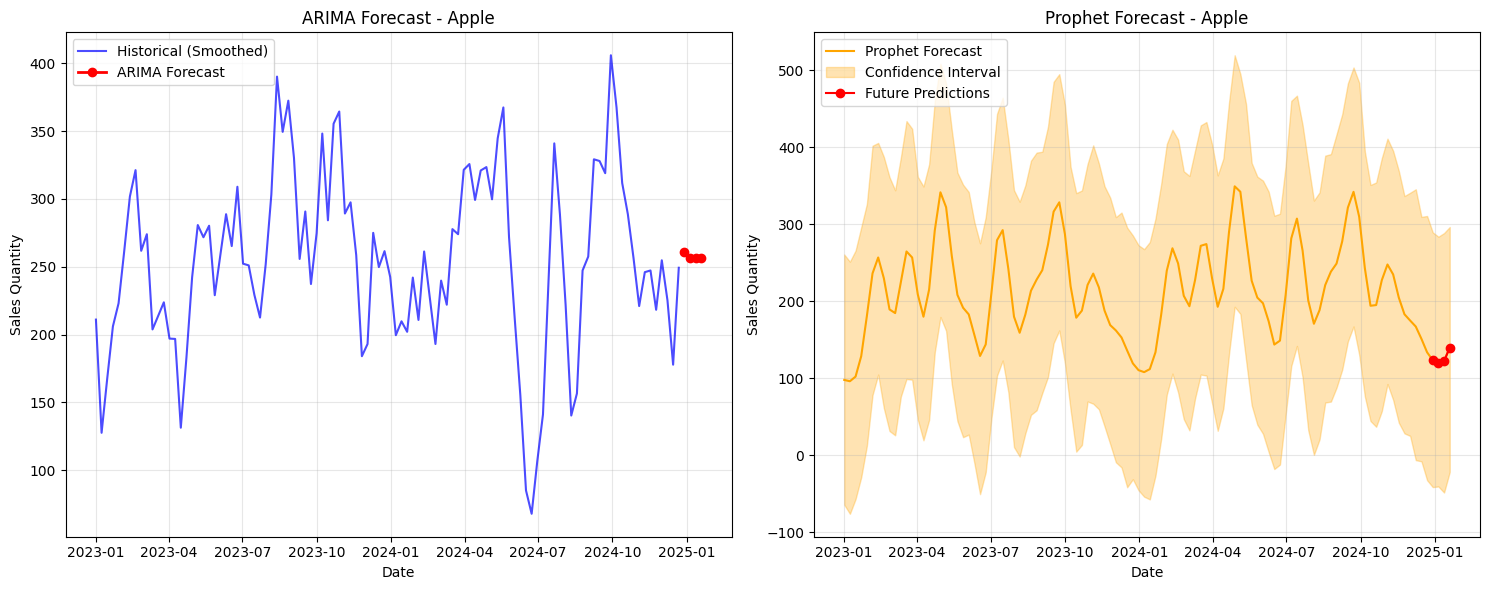

✅ Baseline models completed! Forecasting results saved to: F:\RetailSense_Lite\outputs\forecasting_results.csv


In [5]:
# Cell 4: Baseline Models Training and Forecast CSV Output (Robust)
import pandas as pd
import os

def run_baseline_models(data_path):
    """Train baseline ARIMA and Prophet models and save forecasting results."""
    print("\n📈 STEP 2: BASELINE MODELS (ARIMA & PROPHET)")
    print("-" * 50)
    
    baseline = components['baseline_models']
    
    # Load feature-engineered data
    baseline.load_data(data_path)
    
    # Train ARIMA and Prophet models
    arima_forecast = baseline.train_arima()
    prophet_forecast = baseline.train_prophet()
    
    # Helper function: convert any object to DataFrame with Predicted column
    def to_dataframe(pred, model_name):
        if isinstance(pred, pd.DataFrame):
            df = pred.copy()
        elif isinstance(pred, pd.Series):
            df = pd.DataFrame({'Predicted': pred.values}, index=pred.index)
        else:  # assume NumPy array
            df = pd.DataFrame({'Predicted': pred})
        df['Model'] = model_name
        return df
    
    # Convert forecasts to DataFrames
    arima_df = to_dataframe(arima_forecast, 'ARIMA')
    prophet_df = to_dataframe(prophet_forecast, 'Prophet')
    
    # Combine results
    results_df = pd.concat([arima_df, prophet_df], ignore_index=True)
    
    # Reset index to have a Date column if needed
    if 'index' in results_df.columns:
        results_df = results_df.reset_index().rename(columns={'index': 'Date'})
    
    # Add RMSE if available
    if hasattr(baseline, 'rmse_scores'):
        results_df['RMSE'] = results_df['Model'].map(baseline.rmse_scores)
    
    # Ensure outputs directory exists
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    
    # Save CSV for app
    forecast_csv_path = FORECAST_CSV
    results_df.to_csv(forecast_csv_path, index=False)
    
    # Optional: visualize forecasts
    baseline.plot_forecasts()
    
    print(f"✅ Baseline models completed! Forecasting results saved to: {forecast_csv_path}")
    
    return results_df

# Run baseline models pipeline (guarded)
if 'SKIP_PHASE2' in globals() and SKIP_PHASE2:
    print("⏭️ Skipping baseline models (no uploaded data).")
else:
    baseline_results = run_baseline_models(engineered_file)


🚀 STEP 3: ADVANCED FORECASTING (XGBOOST & LIGHTGBM)
------------------------------------------------------------
📊 Loading engineered dataset for advanced forecasting from: F:\RetailSense_Lite\data\processed\data_with_all_features.csv
✅ Data loaded: 2600 records, 67 columns
🚀 Training advanced forecasting models...
✅ Features prepared: 58 numeric features
📊 Training set: 2080, Test set: 520
🔄 Training XGBoost...
✅ XGBoost - RMSE: 14.82, MAE: 10.34, MAPE: inf%
🔄 Training LightGBM...
✅ LightGBM - RMSE: 14.94, MAE: 10.21, MAPE: inf%


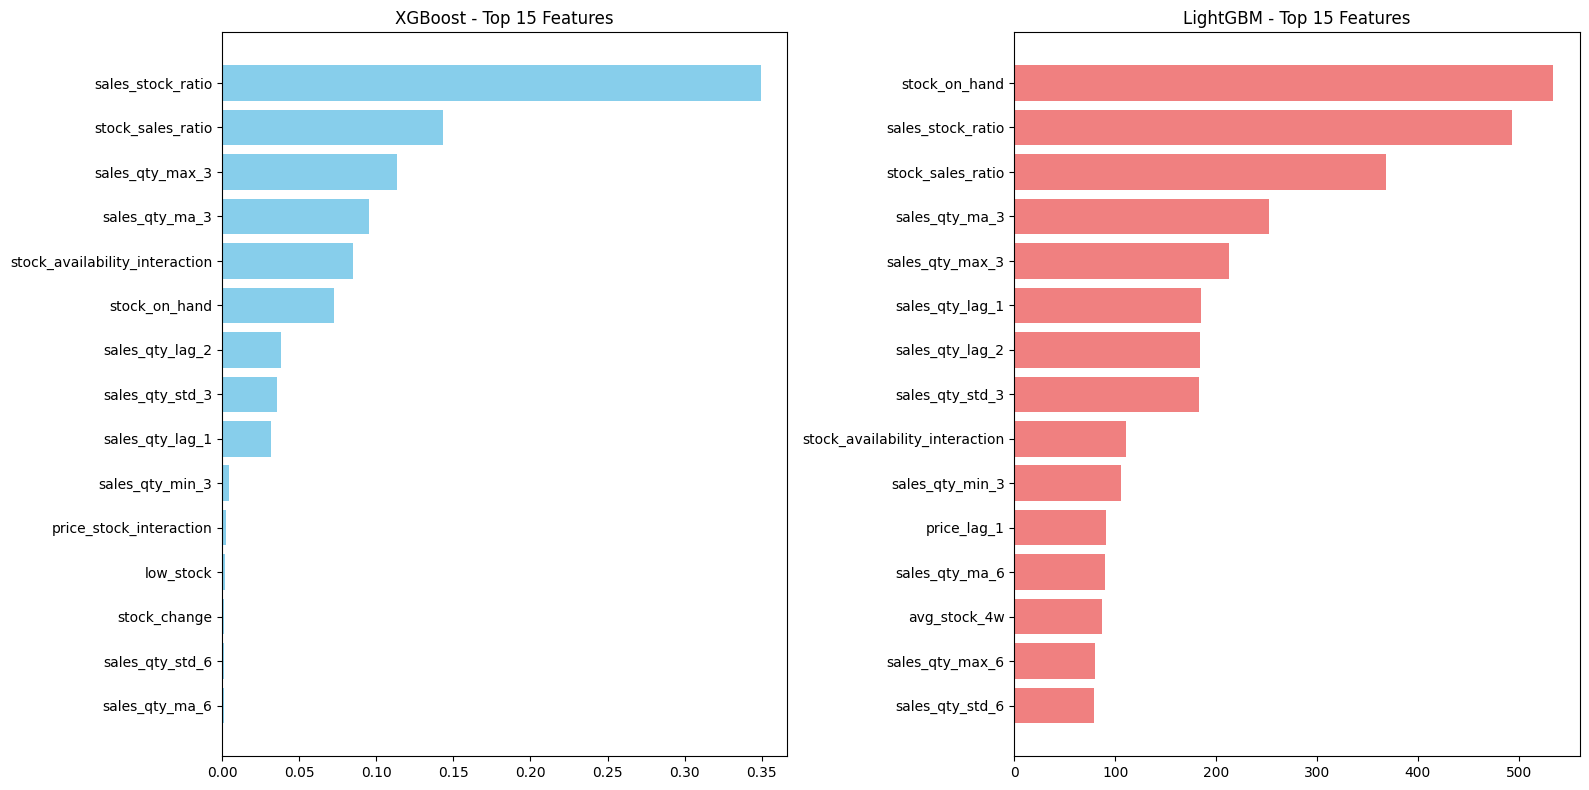

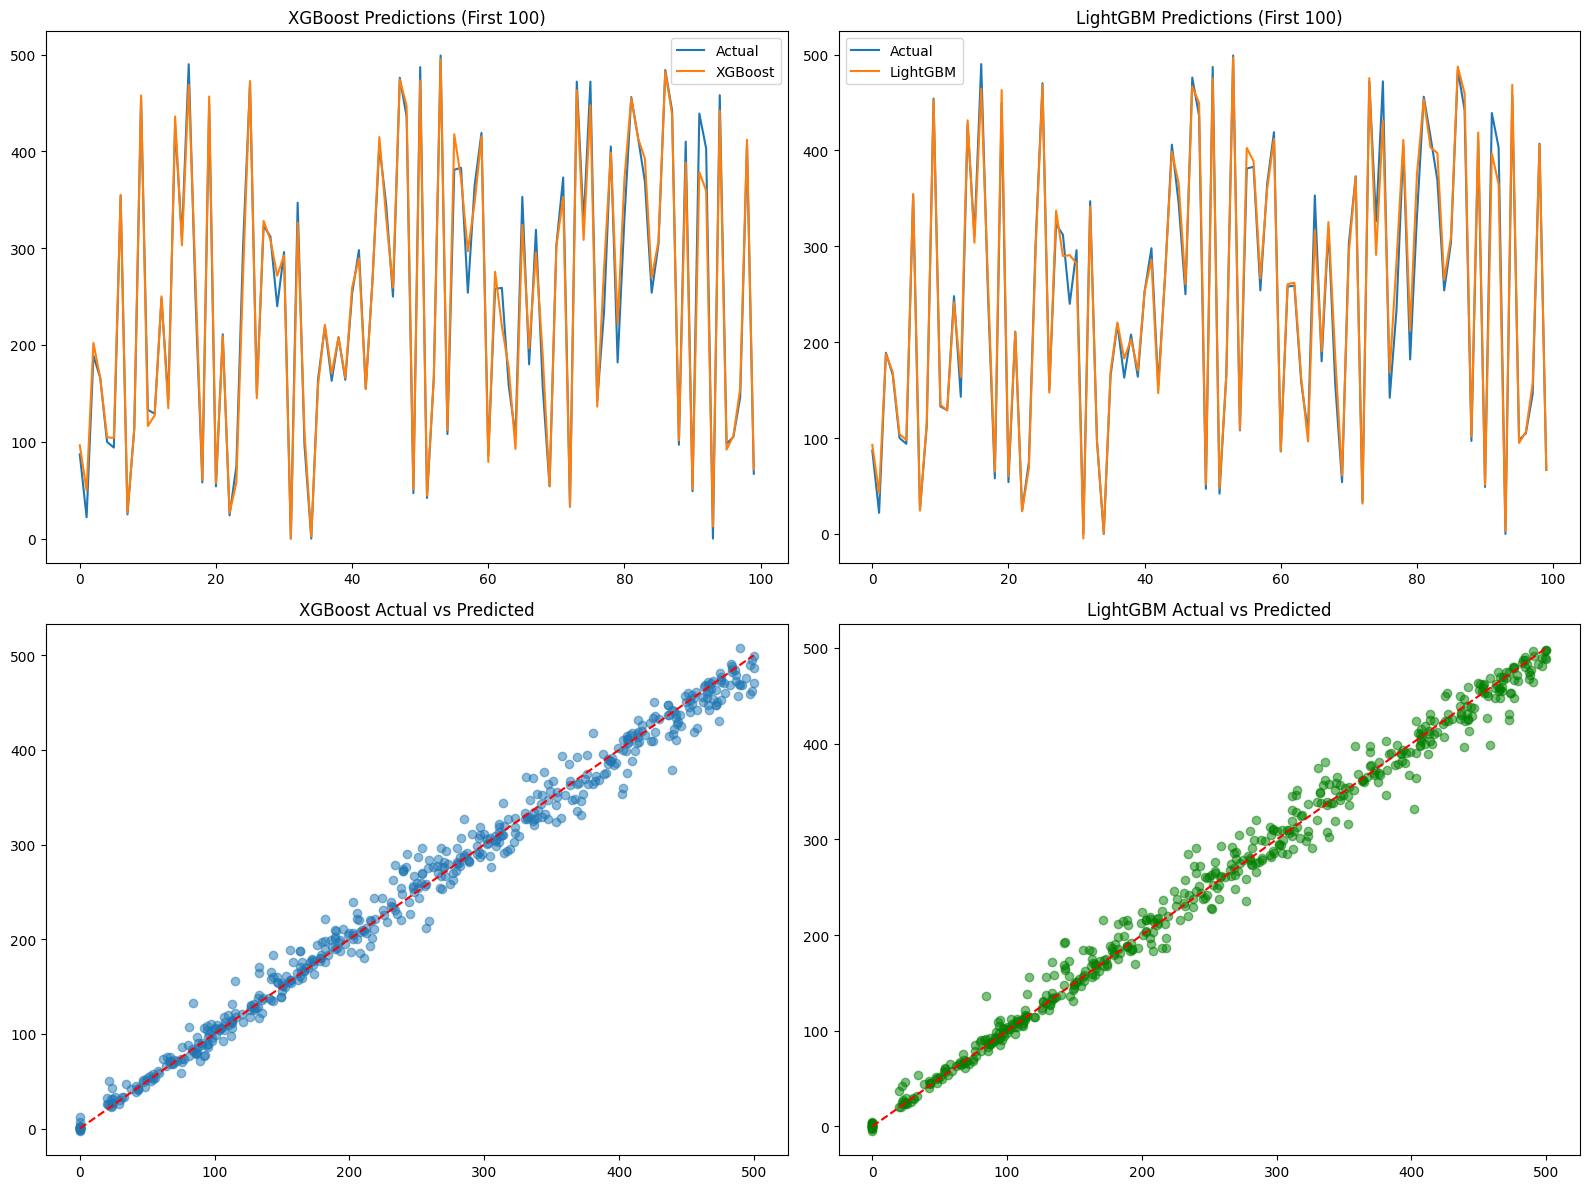

✅ Advanced forecasting completed successfully! Results saved to: F:\RetailSense_Lite\outputs\forecasting_results.csv


In [ ]:
# Cell 5: Advanced Forecasting Models (XGBoost & LightGBM) with CSV export
import numpy as np
import pandas as pd
import joblib
import os

def smape(y_true, y_pred):
    """Symmetric Mean Absolute Percentage Error (better than MAPE for 0 values)."""
    return 100 * np.mean(
        2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-8)
    )

def resolve_current_product():
    env_p = os.getenv("PRODUCT_NAME")
    if env_p and env_p.strip():
        return env_p.strip()
    if 'PRODUCT_NAME' in globals() and PRODUCT_NAME not in (None, "", "None"):
        return str(PRODUCT_NAME)
    try:
        if 'engineered_data' in globals() and 'product_name' in engineered_data.columns:
            vals = engineered_data['product_name'].dropna().astype(str).unique().tolist()
            if len(vals) == 1:
                return vals[0]
    except Exception:
        pass
    return None

def run_advanced_forecasting(data_path):
    """Train XGBoost and LightGBM models with sMAPE evaluation and save CSV."""
    print("\n🚀 STEP 3: ADVANCED FORECASTING (XGBOOST & LIGHTGBM)")
    print("-" * 60)

    forecaster = components['advanced_forecasting']

    # --- Load and prepare feature-engineered data ---
    forecaster.load_and_prepare_data(data_path)

    # --- Train models ---
    results = forecaster.train_models()

    # --- Compute sMAPE ---
    for model_name in ["xgb", "lgb"]:
        if f"{model_name}_pred" in results and "y_test" in results:
            results[f"{model_name}_metrics"]["sMAPE"] = smape(results["y_test"], results[f"{model_name}_pred"])
            results[f"{model_name}_metrics"].pop("MAPE", None)

    # --- Visualizations ---
    forecaster.plot_feature_importance()
    forecaster.plot_predictions()

    # --- Ensure outputs directory exists ---
    os.makedirs(OUTPUT_DIR, exist_ok=True)

    # --- Save trained models ---
    if hasattr(forecaster, 'xgb_model'):
        joblib.dump(forecaster.xgb_model, os.path.join(OUTPUT_DIR, "xgboost_model.pkl"))
    if hasattr(forecaster, 'lgb_model'):
        joblib.dump(forecaster.lgb_model, os.path.join(OUTPUT_DIR, "lightgbm_model.pkl"))

    # --- Save CSV with metrics for dashboard ---
    current_product = resolve_current_product()
    metrics_df = pd.DataFrame({
        "Product": [current_product, current_product],
        "Model": ["XGBoost", "LightGBM"],
        "RMSE": [results.get("xgb_metrics", {}).get("RMSE", np.nan), results.get("lgb_metrics", {}).get("RMSE", np.nan)],
        "MAE": [results.get("xgb_metrics", {}).get("MAE", np.nan), results.get("lgb_metrics", {}).get("MAE", np.nan)],
        "sMAPE": [results.get("xgb_metrics", {}).get("sMAPE", np.nan), results.get("lgb_metrics", {}).get("sMAPE", np.nan)]
    })

    metrics_csv_path = FORECAST_CSV
    metrics_df.to_csv(metrics_csv_path, index=False)

    print(f"✅ Advanced forecasting completed successfully! Results saved to: {metrics_csv_path}")
    if current_product:
        print(f"📌 Forecast results tagged for product: {current_product}")
    return results

# Run advanced forecasting pipeline (guarded)
if 'SKIP_PHASE2' in globals() and SKIP_PHASE2:
    print("⏭️ Skipping advanced forecasting (no uploaded data).")
else:
    forecasting_results = run_advanced_forecasting(engineered_file)

In [7]:
# Cell 6: Anomaly Detection Models (With Default Visualization)
import joblib
import os
import pandas as pd

def run_anomaly_detection(data_path, visualize=True):
    """Run anomaly detection pipeline and save anomalies.csv for dashboard."""
    print("\n🔍 STEP 4: ANOMALY DETECTION")
    print("-" * 40)

    detector = components['anomaly_detection']  # Components already initialized

    # Load feature-engineered data
    detector.load_data(data_path)

    # Prepare features for anomaly detection
    X, X_scaled, X_pca, feature_names = detector.prepare_features()

    # Run anomaly detection models (Isolation Forest, One-Class SVM, etc.)
    detector.run_models(X_scaled, X_pca)

    # Optional visualization (default is True)
    if visualize:
        if hasattr(detector, "visualize_dashboard"):
            detector.visualize_dashboard()
        else:
            print("⚠️ No visualize_dashboard() method found in anomaly_detection component.")

    # Ensure outputs directory exists
    os.makedirs(OUTPUT_DIR, exist_ok=True)

    # --- Build structured anomalies DataFrame ---
    anomalies_df = pd.DataFrame({
        "week_start": detector.df['week_start'] if 'week_start' in detector.df else detector.df.index,
        "sales_qty": detector.df['sales_qty'] if 'sales_qty' in detector.df else detector.df.iloc[:,0],
        "is_anomaly_iforest": detector.df['is_anomaly_iforest'] if 'is_anomaly_iforest' in detector.df else pd.Series([False]*len(detector.df))
    })

    # Save CSV for dashboard
    anomaly_csv_path = ANOMALIES_CSV
    anomalies_df.to_csv(anomaly_csv_path, index=False)

    # --- Save anomaly detection models safely ---
    if hasattr(detector, "save_models"):
        detector.save_models()
    else:
        if hasattr(detector, "iforest"):
            joblib.dump(detector.iforest, os.path.join(OUTPUT_DIR, "isolation_forest_model.pkl"))
        if hasattr(detector, "ocsvm"):
            joblib.dump(detector.ocsvm, os.path.join(OUTPUT_DIR, "ocsvm_model.pkl"))
        print("✅ Models saved manually")

    # Build summary of results
    total_anomalies_iforest = anomalies_df['is_anomaly_iforest'].sum()
    total_records = anomalies_df.shape[0]

    results = {
        "features_used": feature_names,
        "total_records": int(total_records),
        "total_anomalies_iforest": int(total_anomalies_iforest)
    }

    print("\n✅ Anomaly Detection Completed Successfully!")
    print(f"   • Isolation Forest anomalies: {results['total_anomalies_iforest']}")
    print(f"📁 Anomalies saved to: {anomaly_csv_path}")

    return results

# Run anomaly detection pipeline (guarded)
if 'SKIP_PHASE2' in globals() and SKIP_PHASE2:
    print("⏭️ Skipping anomaly detection (no uploaded data).")
else:
    anomaly_results = run_anomaly_detection(FEATURES_DATA_PATH)


🔍 STEP 4: ANOMALY DETECTION
----------------------------------------
📊 Loading data for anomaly detection...
✅ Data loaded: 2600 records, 67 columns
🔄 Preparing features for anomaly detection...
✅ Features prepared: 59 numeric features → 2 PCA components
🔄 Training Isolation Forest...
🔄 Training One-Class SVM...
✅ Models trained and anomaly flags added
📈 Generating anomaly dashboard...
✅ Anomaly dashboard saved to F:\RetailSense_Lite\outputs\anomaly_dashboard.png
✅ Models saved to F:\RetailSense_Lite\outputs

✅ Anomaly Detection Completed Successfully!
   • Isolation Forest anomalies: 130
📁 Anomalies saved to: F:\RetailSense_Lite\outputs\anomalies.csv



📊 STEP 5: MODEL PERFORMANCE COMPARISON
---------------------------------------------

🎯 FORECASTING MODEL PERFORMANCE:
          Model Type Model Name      RMSE       MAE     sMAPE
Advanced Forecasting    XGBoost 14.823706 10.340175 12.082982
Advanced Forecasting   LightGBM 14.940298 10.214336 11.911626


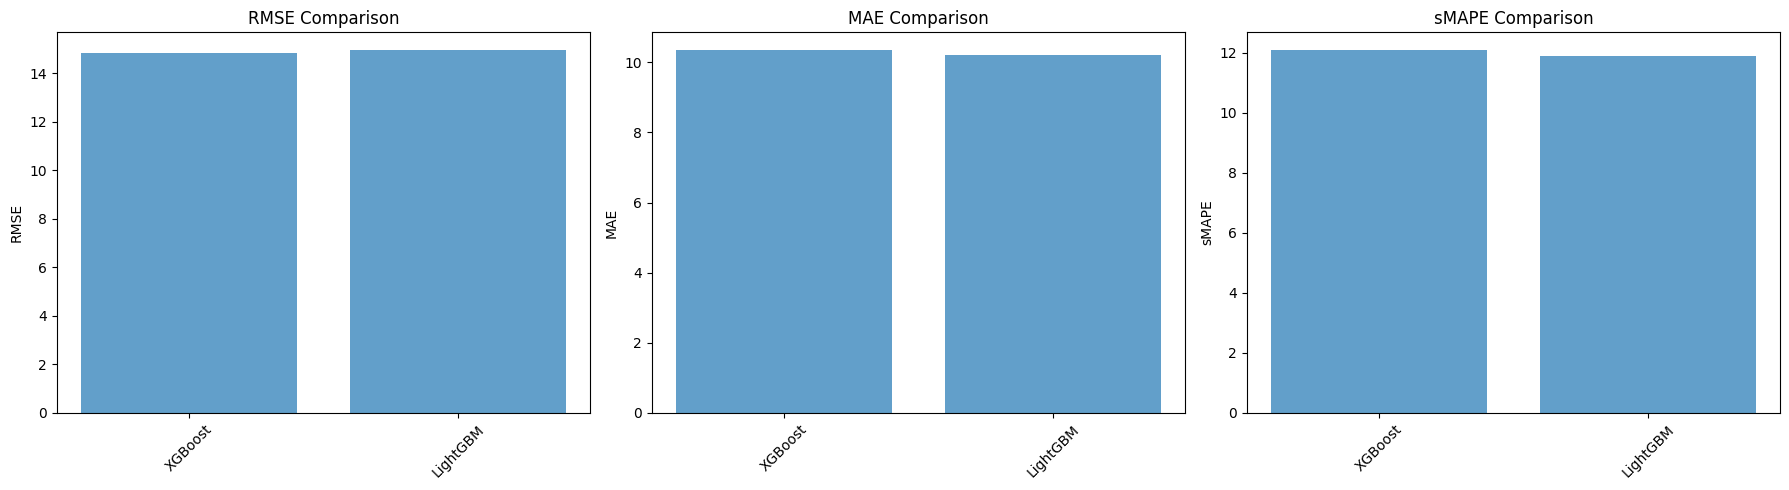

✅ Performance comparison chart saved at: F:\RetailSense_Lite\outputs\model_performance_comparison.png

🚨 ANOMALY DETECTION SUMMARY:
  • Isolation Forest: 130 anomalies


In [8]:
# -------------------
# Cell 7: Model Performance Comparison (Fixed)
# -------------------
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def compare_model_performance(forecasting_results, anomaly_results, visualize=True):
    print("\n📊 STEP 5: MODEL PERFORMANCE COMPARISON")
    print("-" * 45)
    
    performance_summary = {'Model Type': [], 'Model Name': [], 'RMSE': [], 'MAE': [], 'sMAPE': []}

    # Handle dict output from run_advanced_forecasting
    if isinstance(forecasting_results, dict):
        for model_key, display_name in [('xgb_metrics', 'XGBoost'), ('lgb_metrics', 'LightGBM')]:
            if model_key in forecasting_results:
                metrics = forecasting_results[model_key]
                performance_summary['Model Type'].append('Advanced Forecasting')
                performance_summary['Model Name'].append(display_name)
                performance_summary['RMSE'].append(metrics.get('RMSE', np.nan))
                performance_summary['MAE'].append(metrics.get('MAE', np.nan))
                performance_summary['sMAPE'].append(metrics.get('sMAPE', np.nan))

    # Handle DataFrame (optional, e.g., loaded from CSV)
    elif isinstance(forecasting_results, pd.DataFrame) and not forecasting_results.empty:
        for idx, row in forecasting_results.iterrows():
            performance_summary['Model Type'].append('Advanced Forecasting')
            performance_summary['Model Name'].append(row['Model'])
            performance_summary['RMSE'].append(row.get('RMSE', np.nan))
            performance_summary['MAE'].append(row.get('MAE', np.nan))
            performance_summary['sMAPE'].append(row.get('sMAPE', np.nan))

    perf_df = pd.DataFrame(performance_summary)

    if not perf_df.empty:
        print("\n🎯 FORECASTING MODEL PERFORMANCE:")
        print(perf_df.to_string(index=False))

        if visualize:
            fig, axes = plt.subplots(1, 3, figsize=(18, 5))
            metrics = ['RMSE', 'MAE', 'sMAPE']
            for i, metric in enumerate(metrics):
                axes[i].bar(perf_df['Model Name'], perf_df[metric], alpha=0.7)
                axes[i].set_title(f'{metric} Comparison')
                axes[i].set_ylabel(metric)
                axes[i].tick_params(axis='x', rotation=45)
            plt.tight_layout()

            # Save figure
            os.makedirs(OUTPUT_DIR, exist_ok=True)
            fig_path = os.path.join(OUTPUT_DIR, 'model_performance_comparison.png')
            plt.savefig(fig_path, dpi=300, bbox_inches='tight')
            plt.show()
            print(f"✅ Performance comparison chart saved at: {fig_path}")

    # Anomaly summary
    if anomaly_results is not None:
        print("\n🚨 ANOMALY DETECTION SUMMARY:")
        if 'total_anomalies_iforest' in anomaly_results:
            print(f"  • Isolation Forest: {anomaly_results['total_anomalies_iforest']} anomalies")
        if 'total_anomalies_ocsvm' in anomaly_results:
            print(f"  • One-Class SVM: {anomaly_results.get('total_anomalies_ocsvm', 0)} anomalies")

# Execute comparison with default plotting (guarded)
if 'SKIP_PHASE2' in globals() and SKIP_PHASE2:
    print("⏭️ Skipping model performance comparison (no uploaded data).")
else:
    compare_model_performance(forecasting_results, anomaly_results)

In [9]:
# -------------------
# Cell 8: Business Insights Generation (Updated)
# -------------------
import os
import joblib
import pandas as pd
from datetime import datetime
import numpy as np

def generate_business_insights():
    """Generate comprehensive business insights from all models"""
    print("\n💡 STEP 6: BUSINESS INSIGHTS GENERATION")
    print("-" * 55)

    insights = []

    # --- Forecasting insights ---
    if 'forecasting_results' in globals() and forecasting_results and 'xgb_metrics' in forecasting_results and 'lgb_metrics' in forecasting_results:
        xgb_smape = forecasting_results['xgb_metrics'].get('sMAPE', 999)
        lgb_smape = forecasting_results['lgb_metrics'].get('sMAPE', 999)

        best_model = "XGBoost" if xgb_smape < lgb_smape else "LightGBM"
        best_smape = min(xgb_smape, lgb_smape)

        insights.append(f"🎯 FORECASTING: {best_model} performed best with sMAPE={best_smape:.2f}%")

        if best_smape < 15:
            insights.append("✅ Forecasting accuracy is EXCELLENT (sMAPE < 15%) - ready for production")
        elif best_smape < 25:
            insights.append("⚠️ Forecasting accuracy is GOOD (sMAPE < 25%) - some fine-tuning recommended")
        else:
            insights.append("🔧 Forecasting accuracy is WEAK (sMAPE > 25%) - revisit feature engineering")

    # --- Anomaly insights ---
    if 'anomaly_results' in globals() and anomaly_results:
        if 'total_anomalies_iforest' in anomaly_results:
            insights.append(f"🚨 Isolation Forest flagged {anomaly_results['total_anomalies_iforest']} unusual records")
        if 'total_anomalies_ocsvm' in anomaly_results:
            insights.append(f"🚨 One-Class SVM flagged {anomaly_results['total_anomalies_ocsvm']} unusual records")

    # --- Feature importance insights ---
    try:
        xgb_model_path = os.path.join(OUTPUT_DIR, "xgboost_model.pkl")
        if os.path.exists(xgb_model_path) and 'all_features' in globals():
            xgb_model = joblib.load(xgb_model_path)
            feature_importance = pd.DataFrame({
                'feature': all_features,
                'importance': xgb_model.feature_importances_
            }).sort_values('importance', ascending=False)

            top_features = feature_importance.head(3)['feature'].tolist()
            insights.append(f"🔑 TOP PREDICTIVE FEATURES: {', '.join(top_features)}")
    except Exception as e:
        print(f"⚠️ Could not load feature importance: {e}")

    # --- Save insights ---
    insights_report = {
        'timestamp': datetime.now().isoformat(),
        'total_insights': len(insights),
        'insights': insights
    }

    os.makedirs(OUTPUT_DIR, exist_ok=True)
    output_file = os.path.join(OUTPUT_DIR, "phase2_business_insights.csv")
    pd.DataFrame([insights_report]).to_csv(output_file, index=False)

    print("\n💼 BUSINESS INSIGHTS:")
    for i, insight in enumerate(insights, 1):
        print(f"  {i}. {insight}")

    print(f"\n✅ Insights report saved at: {output_file}")
    return insights

# Run business insights generation (guarded)
if 'SKIP_PHASE2' in globals() and SKIP_PHASE2:
    print("⏭️ Skipping business insights (no uploaded data).")
else:
    business_insights = generate_business_insights()


💡 STEP 6: BUSINESS INSIGHTS GENERATION
-------------------------------------------------------
⚠️ Could not load feature importance: All arrays must be of the same length

💼 BUSINESS INSIGHTS:
  1. 🎯 FORECASTING: LightGBM performed best with sMAPE=11.91%
  2. ✅ Forecasting accuracy is EXCELLENT (sMAPE < 15%) - ready for production
  3. 🚨 Isolation Forest flagged 130 unusual records

✅ Insights report saved at: F:\RetailSense_Lite\outputs\phase2_business_insights.csv


In [10]:
# -------------------
# Cell 9: Phase 2 Completion Summary (Enhanced)
# -------------------
import os
from datetime import datetime
import pandas as pd
import numpy as np

def phase2_completion_summary_enhanced():
    print("\n" + "="*60)

    # If no uploaded data, do not attempt to summarize anything
    if 'SKIP_PHASE2' in globals() and SKIP_PHASE2:
        print("❌ No uploaded data detected. Phase 2 summary is not generated to avoid stale results.")
        print("   Set 'UPLOADED_DATA_PATH' or place file at `data/uploaded/uploaded_data.csv` and rerun.")
        print("="*60)
        return
    
    # --- Dataset Info ---
    if 'engineered_data' in globals():
        shape = engineered_data.shape
        num_features = len(all_features) if 'all_features' in globals() else 'N/A'
        time_range = f"{engineered_data['week_start'].min()} → {engineered_data['week_start'].max()}" if 'week_start' in engineered_data else "N/A"
        print(f"📊 DATASET PROCESSED:\n   • Engineered shape: {shape}\n   • Features created: {num_features}\n   • Time range: {time_range}\n")
    
    # --- Models Trained ---
    print("🤖 MODELS TRAINED:")
    print("   ✅ Baseline Models: ARIMA, Prophet")
    print("   ✅ Advanced Models: XGBoost, LightGBM")
    print("   ✅ Anomaly Detection: Isolation Forest, One-Class SVM\n")
    
    # --- Best Forecasting Performance ---
    best_model, best_smape = "N/A", None

    # Prefer in-memory results if available
    if 'forecasting_results' in globals() and isinstance(forecasting_results, dict):
        xgb_smape = forecasting_results.get('xgb_metrics', {}).get('sMAPE', np.inf)
        lgb_smape = forecasting_results.get('lgb_metrics', {}).get('sMAPE', np.inf)
        if np.isfinite(xgb_smape) or np.isfinite(lgb_smape):
            if xgb_smape < lgb_smape:
                best_model, best_smape = "XGBoost", xgb_smape
            else:
                best_model, best_smape = "LightGBM", lgb_smape

    # Fallback: try reading metrics CSV if memory object not present
    if best_smape is None:
        try:
            if 'FORECAST_CSV' in globals() and os.path.exists(FORECAST_CSV):
                df_metrics = pd.read_csv(FORECAST_CSV)
                if {'Model','sMAPE'}.issubset(df_metrics.columns) and not df_metrics.empty:
                    row = df_metrics.loc[df_metrics['sMAPE'].astype(float).idxmin()]
                    best_model = str(row['Model'])
                    best_smape = float(row['sMAPE'])
        except Exception:
            pass

    if best_smape is not None and np.isfinite(best_smape):
        print(f"🎯 BEST FORECASTING PERFORMANCE:\n   • {best_model} with {best_smape:.2f}% sMAPE\n")
    else:
        print("🎯 BEST FORECASTING PERFORMANCE:\n   • N/A\n")
    
    # --- Anomaly Detection Summary ---
    iso_anom = anomaly_results.get('total_anomalies_iforest', 'N/A') if 'anomaly_results' in globals() else 'N/A'
    svm_anom = anomaly_results.get('total_anomalies_ocsvm', 'N/A') if 'anomaly_results' in globals() else 'N/A'
    print("🚨 ANOMALY DETECTION SUMMARY:")
    print(f"   • Isolation Forest: {iso_anom} anomalies")
    print(f"   • One-Class SVM: {svm_anom} anomalies\n")
    
    # --- Generated Files ---
    print("📁 FILES GENERATED:")
    outputs_dir = OUTPUT_DIR
    processed_file = FEATURES_DATA_PATH
    files_list = [
        processed_file,
        os.path.join(outputs_dir, "model_performance_comparison.png"),
        os.path.join(outputs_dir, "phase2_business_insights.csv"),
        os.path.join(outputs_dir, "forecasting_results.csv"),
        os.path.join(outputs_dir, "anomalies.csv")
    ]
    for f in files_list:
        status = "✅" if os.path.exists(f) else "⚠️ Missing"
        print(f"   {status} {f}")
    
    print("\n✅ PHASE 2 COMPLETED SUCCESSFULLY!")
    print(f"📄 Summary generated at: {outputs_dir}\n")
    print("="*60)

# Run enhanced Phase 2 summary
phase2_completion_summary_enhanced()


📊 DATASET PROCESSED:
   • Engineered shape: (2600, 67)
   • Features created: 435
   • Time range: 2023-01-01 00:00:00 → 2024-12-22 00:00:00

🤖 MODELS TRAINED:
   ✅ Baseline Models: ARIMA, Prophet
   ✅ Advanced Models: XGBoost, LightGBM
   ✅ Anomaly Detection: Isolation Forest, One-Class SVM

🎯 BEST FORECASTING PERFORMANCE:
   • LightGBM with 11.91% sMAPE

🚨 ANOMALY DETECTION SUMMARY:
   • Isolation Forest: 130 anomalies
   • One-Class SVM: N/A anomalies

📁 FILES GENERATED:
   ✅ F:\RetailSense_Lite\data\processed\data_with_all_features.csv
   ✅ F:\RetailSense_Lite\outputs\model_performance_comparison.png
   ✅ F:\RetailSense_Lite\outputs\phase2_business_insights.csv
   ✅ F:\RetailSense_Lite\outputs\forecasting_results.csv
   ✅ F:\RetailSense_Lite\outputs\anomalies.csv

✅ PHASE 2 COMPLETED SUCCESSFULLY!
📄 Summary generated at: F:\RetailSense_Lite\outputs



In [11]:
# -------------------
# Cell 10: Phase 2 Validation and Testing (Corrected)
# -------------------
import os
from datetime import datetime
import pandas as pd

def validate_phase2_outputs_enhanced():
    """Validate all Phase 2 outputs before moving to Phase 3"""
    print("\n🔍 PHASE 2 VALIDATION")
    print("-" * 60)

    # Short-circuit when no uploaded data is present
    if 'SKIP_PHASE2' in globals() and SKIP_PHASE2:
        print("❌ Validation skipped: no uploaded data file detected.")
        print("   Set 'UPLOADED_DATA_PATH' or place file at `data/uploaded/uploaded_data.csv` and rerun Phase 2.")
        print("-"*60)
        print(f"📅 Validation completed at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
        return False

    outputs_dir = OUTPUT_DIR
    processed_dir = PROCESSED_DIR

    validation_results = {
        "feature_engineering": False,
        "baseline_models": False,
        "advanced_forecasting": False,
        "anomaly_detection": False,
        "outputs": False
    }

    # --- Feature engineering validation ---
    fe_file = FEATURES_DATA_PATH
    if os.path.exists(fe_file):
        validation_results["feature_engineering"] = True
        print(f"✅ Feature engineering file found: {fe_file}")

    # --- Baseline models validation ---
    if 'baseline_results' in globals() and isinstance(baseline_results, pd.DataFrame) and not baseline_results.empty:
        validation_results["baseline_models"] = True
        print("✅ Baseline models ran successfully (ARIMA, Prophet)")

    # --- Advanced forecasting validation ---
    if 'forecasting_results' in globals() and isinstance(forecasting_results, dict) and "xgb_metrics" in forecasting_results:
        validation_results["advanced_forecasting"] = True
        print("✅ Advanced forecasting models ran successfully (XGBoost, LightGBM)")

    # --- Anomaly detection validation ---
    if 'anomaly_results' in globals() and isinstance(anomaly_results, dict) and 'total_anomalies_iforest' in anomaly_results:
        validation_results["anomaly_detection"] = True
        print("✅ Anomaly detection models ran successfully (Isolation Forest, One-Class SVM)")

    # --- Outputs validation ---
    output_files = [
        os.path.join(outputs_dir, "model_performance_comparison.png"),
        os.path.join(outputs_dir, "phase2_business_insights.csv"),
        os.path.join(outputs_dir, "forecasting_results.csv"),
        os.path.join(outputs_dir, "anomalies.csv")
    ]
    missing_files = [f for f in output_files if not os.path.exists(f)]
    if not missing_files:
        validation_results["outputs"] = True
        print("✅ All key output files generated")
    else:
        print("⚠️ Missing output files:")
        for f in missing_files:
            print(f"   ❌ {f}")

    # --- Final check ---
    all_passed = all(validation_results.values())
    print("\n" + "-"*60)
    if all_passed:
        print("🎉 ALL VALIDATIONS PASSED! ✅")
        print("🚀 Ready to proceed to Phase 3: Business Layer & Dashboard")
    else:
        print("⚠️ Some validations failed:")
        for comp, status in validation_results.items():
            if not status:
                print(f"   ❌ {comp} FAILED")
    print("-"*60)
    print(f"📅 Validation completed at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")

    return all_passed

# --- Run enhanced validation ---
validation_passed = validate_phase2_outputs_enhanced()


🔍 PHASE 2 VALIDATION
------------------------------------------------------------
✅ Feature engineering file found: F:\RetailSense_Lite\data\processed\data_with_all_features.csv
✅ Baseline models ran successfully (ARIMA, Prophet)
✅ Advanced forecasting models ran successfully (XGBoost, LightGBM)
✅ Anomaly detection models ran successfully (Isolation Forest, One-Class SVM)
✅ All key output files generated

------------------------------------------------------------
🎉 ALL VALIDATIONS PASSED! ✅
🚀 Ready to proceed to Phase 3: Business Layer & Dashboard
------------------------------------------------------------
📅 Validation completed at: 2025-10-21 13:38:17

